In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
!wget $data

--2024-11-14 21:16:34--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.003s  

2024-11-14 21:16:34 (96.0 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [47]:
df = pd.read_csv('laptops.csv', on_bad_lines='skip')

In [48]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [49]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df2 = df[['ram', 'storage', 'screen', 'final_price']]

In [50]:
df2.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

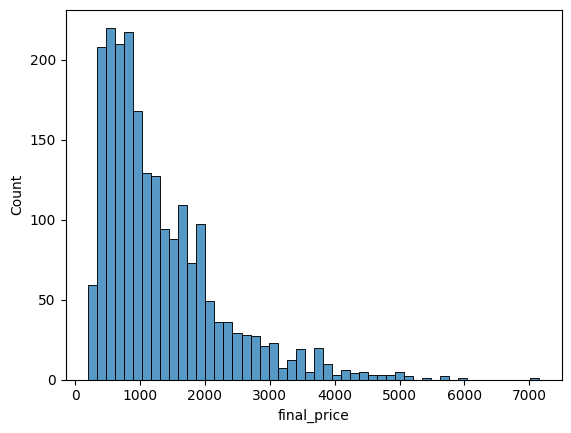

In [51]:
sns.histplot(df2['final_price'], bins=50)

In [52]:
df2.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [53]:
df2['ram'].median()

np.float64(16.0)

In [54]:
np.random.seed(42)

In [55]:
train, validate, test = np.split(df2.sample(frac=1, random_state=42).reset_index(drop=True), [int(.6*len(df2)), int(.8*len(df2))])

/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [56]:
train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [57]:
validate.head()

,ram,storage,screen,final_price
1296,32,1000,16.0,2599.00
1297,16,512,15.6,999.00
1298,12,512,15.6,477.28
1299,8,256,13.6,1519.00
1300,8,512,15.6,402.99


In [58]:
len(train)

1296

In [59]:
len(validate)

432

In [60]:
len(test)

432

In [61]:
len(df2)

2160

In [62]:
train['screen'] = train['screen'].fillna(value = train['screen'].mean())
test['screen'] = test['screen'].fillna(value = train['screen'].mean())
validate['screen'] = validate['screen'].fillna(value = train['screen'].mean())

In [63]:
from sklearn.linear_model import LinearRegression as LM

In [64]:
X = train.drop(columns='final_price').to_numpy()
X

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [65]:
y = train['final_price'].to_numpy()
y

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [66]:
reg = LM().fit(X, y)

In [81]:
X_val = validate.drop(columns='final_price').to_numpy()
y_val = validate['final_price'].to_numpy()

In [82]:
y_hat_val = reg.predict(X_val)

In [91]:
np.sqrt(np.mean((y_hat_val - y_val) ** 2))

np.float64(600.2650313748461)

In [94]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_val, y_hat_val)
rmse

np.float64(600.2650313748461)

In [95]:
from sklearn.linear_model import Ridge
alpha = 1.0
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X, y)

Ridge()